## Testing Framework Output

* SimRateMutation: Parameter(Simulation) - rate of mutation (evaluated at each speciation per gene)
* SimRateHGT: Parameter(Simulation) - rate of horizontal gene transfer (as percentage of speciated genome)
* SimRateDrop: Parameter(Simulation) - rate of gene drop (evaluated at each speciation per gene)
* Distance: Parameter(Testing) - Maximum ancestor distance from "root" species (average of all gene distances)
* MinTaxaRep: Parameter(Testing) - Minimum percent required of protein coverage for a species to be included next step
* MinProteinRep: Parameter(Testing) - Minimum percent required of ancestor coverage for a protein to be included in profile
* ProfileHostDefinition: Count of proteins in host profile
* ProfileSymDefinition: Count of protein in symbiont profile
* ComparedHost: Actual number of proteins from host lineage present in host genome
* ComparedSym: Actual number of proteins from symbiont lineage present in host genome
* ComparedTotal: Total number of proteins present in host genome
* ProfileGoodHost: Number of correct host profile identifications
* ProfileGoodSym: Number of correct symbiont profile identifications
* ProfileAmbigHost: Number of amibiguous host profile identifications (protein was also in symbiont profile)
* ProfileAmbigSym: Number of ambiguous symiont profile identifications (protein was also in host profile)
* ProfileBadHost: Number of incorrect host profile identifications
* ProfileBadSym: Number of incorrect symbiont profile identifications 
* HGTGood: Number of correct HGT predictions
* HGTBad: Number of incorrect HGT predictions

**The following is an example random sampling from the dataframe:**

In [3]:
resultsSet <- read.csv("twestbrook-hgt1-results.txt", sep = "\t")
exampleSet <- resultsSet[sample(nrow(resultsSet), 5),]
tail(exampleSet)

,SimRateMutation,SimRateHGT,SimRateDrop,Distance,MinTaxaRep,MinProteinRep,ProfileHostDefinition,ProfileSymDefinition,ComparedHost,ComparedSym,ComparedTotal,ProfileGoodHost,ProfileGoodSym,ProfileAmbigHost,ProfileAmbigSym,ProfileBadHost,ProfileBadSym,HGTGood,HGTBad
130796,0.3,0.3,0.4,0.7,0.9,0.5,0,0,184,158,490,0,0,0,0,184,158,0,101
16013,0.0,0.2,0.4,0.0,0.1,0.2,0,0,188,93,369,0,0,0,0,188,93,0,56
194668,0.5,0.2,0.2,0.6,0.6,0.7,520,514,334,120,558,151,5,0,1,183,115,2,37
113345,0.3,0.0,0.5,0.3,0.4,0.4,0,0,116,0,116,0,0,0,0,116,0,0,0
133521,0.3,0.4,0.1,0.5,0.2,0.0,722,720,398,337,1092,247,66,11,12,151,271,6,59


## Analysis

Effectiveness of phylogenetic profiling based on good profile hits out of total possible profile hits. <span style="color:red">**Note: this doesn't currently incorporate ambiguous hits - need to record ambiguous total**</span>.

Given this, calculate the effectiveness for both host and symbiont, then plot:

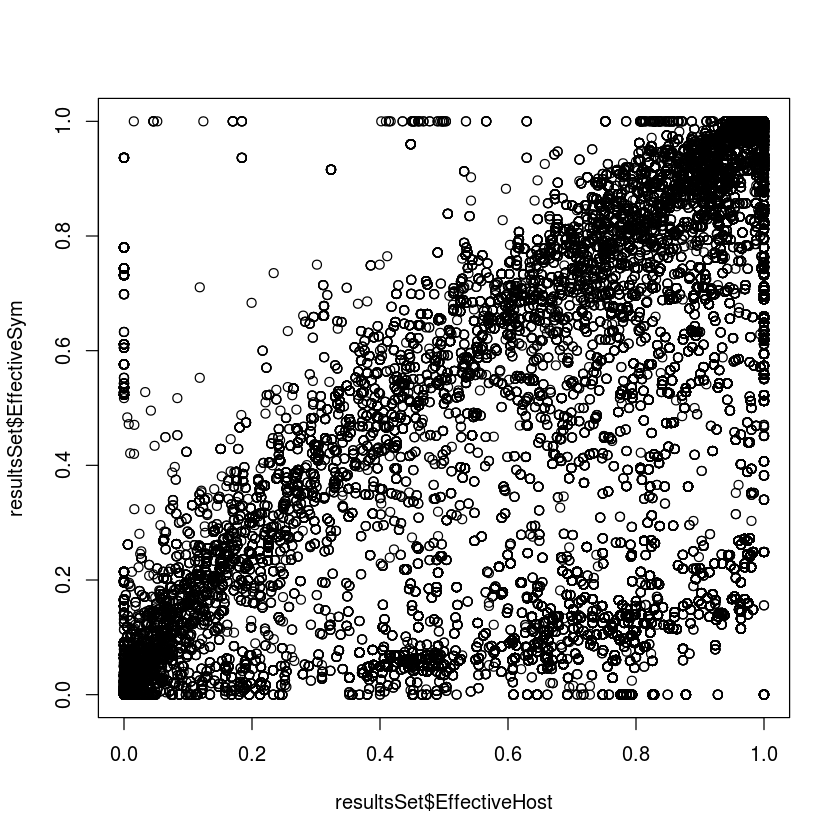

In [4]:
resultsSet$EffectiveHost <- resultsSet$ProfileGoodHost / resultsSet$ComparedHost
resultsSet$EffectiveSym <- resultsSet$ProfileGoodSym / resultsSet$ComparedSym
plot(resultsSet$EffectiveHost, resultsSet$EffectiveSym)

Attempt to partially compensate by subtracting the ambiguous hits from the good hits. However, the percentage is still calculated out of all possible good hits, some of which are ambiguous (and shouldn't count).  

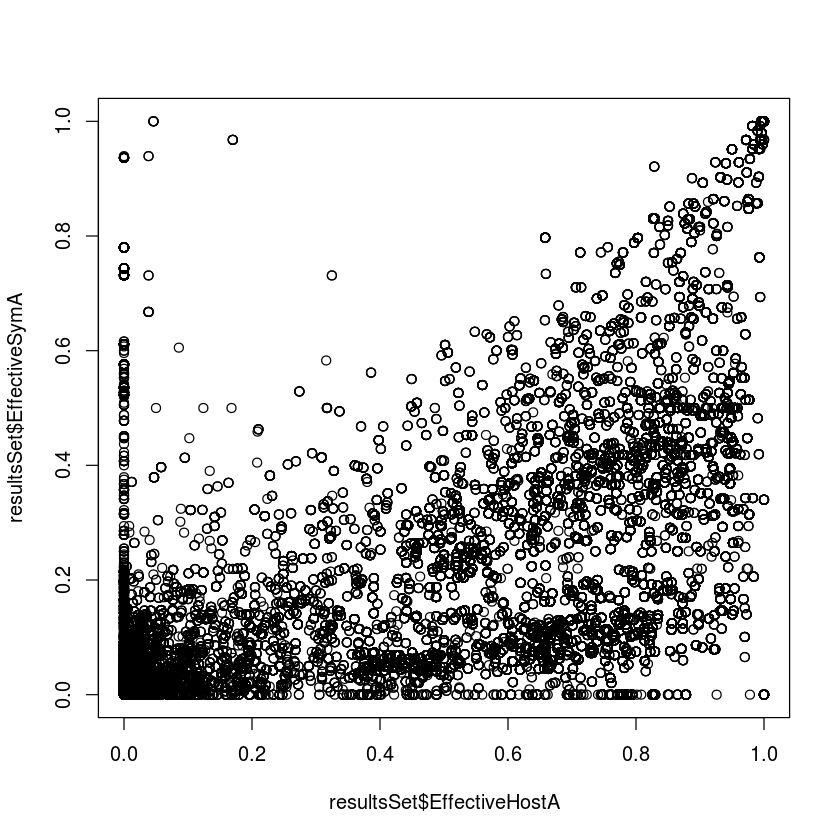

In [5]:
resultsSet$EffectiveHostA <- (resultsSet$ProfileGoodHost - resultsSet$ProfileAmbigHost) / resultsSet$ComparedHost
resultsSet$EffectiveSymA <- (resultsSet$ProfileGoodSym - resultsSet$ProfileAmbigSym) / resultsSet$ComparedSym
plot(resultsSet$EffectiveHostA, resultsSet$EffectiveSymA)

Condense effectiveness into a single value by averaging these two values.  Isolate the parameters and this total effectiveness into a new dataframe. Then show a correlation matrix, and pairwise comparisons for simulation and testing parameters against total effectiveness.

,resultsSet.SimRateMutation,resultsSet.SimRateHGT,resultsSet.SimRateDrop,resultsSet.Distance,resultsSet.MinTaxaRep,resultsSet.MinProteinRep,resultsSet.EffectiveCombined
resultsSet.SimRateMutation,1.000000e+00,-1.217546e-01,-7.114784e-03,-4.227386e-03,-1.522452e-05,-1.522452e-05,-0.181522570
resultsSet.SimRateHGT,-1.217546e-01,1.000000e+00,-3.434171e-03,-2.040479e-03,-7.348586e-06,-7.348586e-06,-0.324701378
resultsSet.SimRateDrop,-7.114784e-03,-3.434171e-03,1.000000e+00,3.761667e-03,1.354728e-05,1.354728e-05,-0.031956297
resultsSet.Distance,-4.227386e-03,-2.040479e-03,3.761667e-03,1.000000e+00,-1.642557e-06,-1.642557e-06,0.312821481
resultsSet.MinTaxaRep,-1.522452e-05,-7.348586e-06,1.354728e-05,-1.642557e-06,1.000000e+00,1.456674e-05,-0.001574651
resultsSet.MinProteinRep,-1.522452e-05,-7.348586e-06,1.354728e-05,-1.642557e-06,1.456674e-05,1.000000e+00,0.015998112
resultsSet.EffectiveCombined,-1.815226e-01,-3.247014e-01,-3.195630e-02,3.128215e-01,-1.574651e-03,1.599811e-02,1.000000000


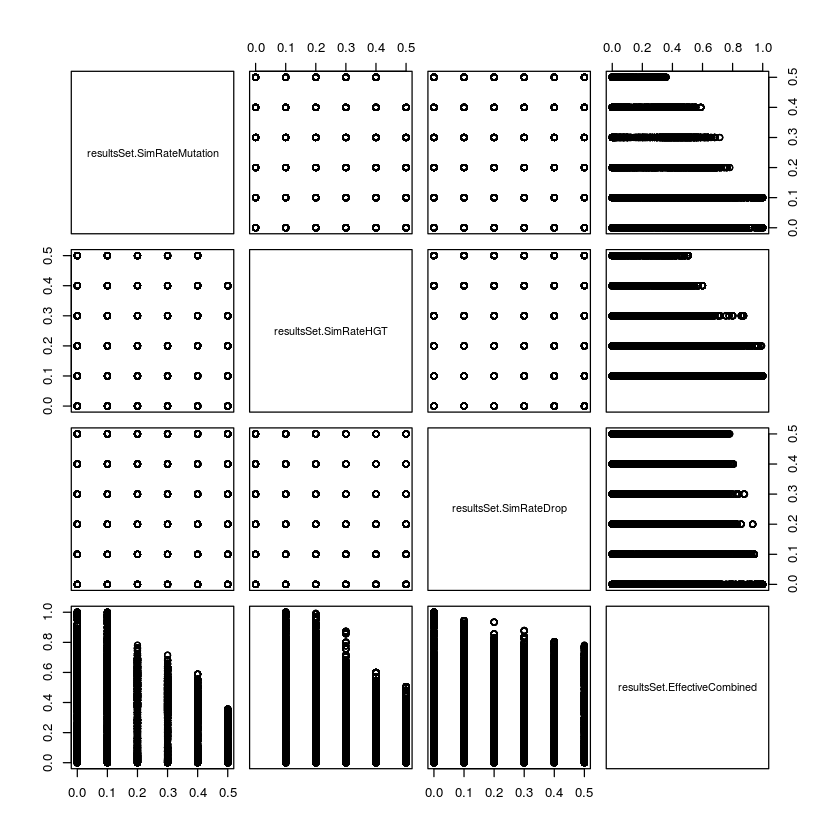

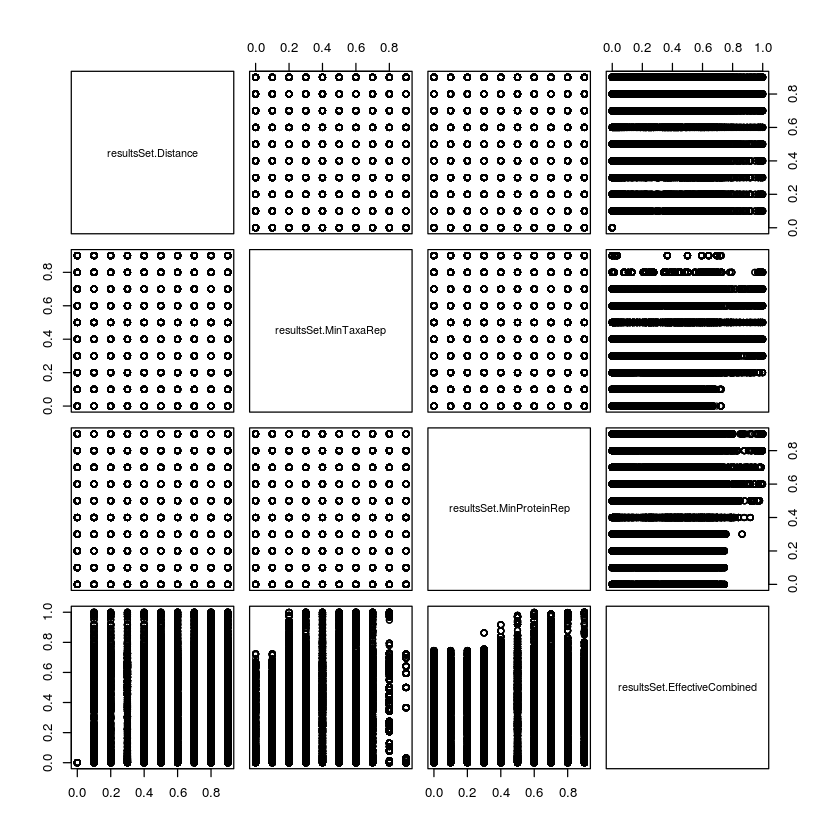

In [7]:
resultsSet$EffectiveCombined <- (resultsSet$EffectiveHostA + resultsSet$EffectiveSymA) / 2
parameterSet <- data.frame(resultsSet$SimRateMutation, 
                           resultsSet$SimRateHGT, 
                           resultsSet$SimRateDrop, 
                           resultsSet$Distance, 
                           resultsSet$MinTaxaRep, 
                           resultsSet$MinProteinRep,
                           resultsSet$EffectiveCombined)
cor(parameterSet, use="complete")

# Simulation parameters
pairs(parameterSet[, c(1, 2, 3, 7)])

# Testing parameters
pairs(parameterSet[, c(4, 5, 6, 7)])

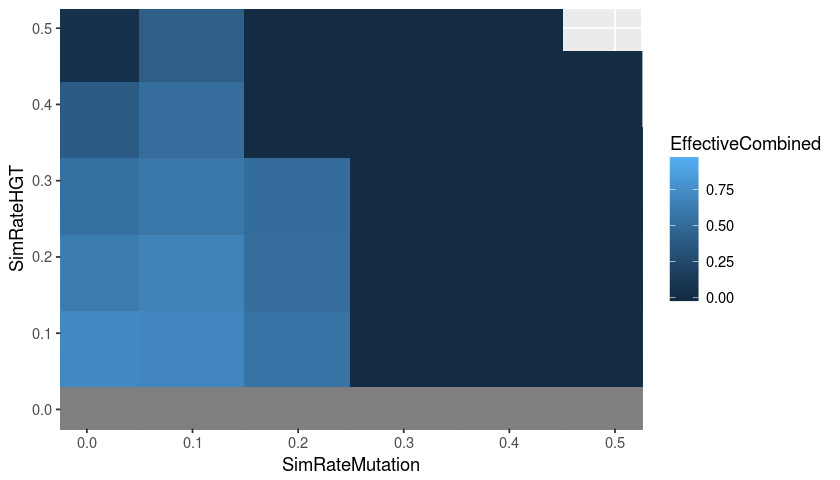

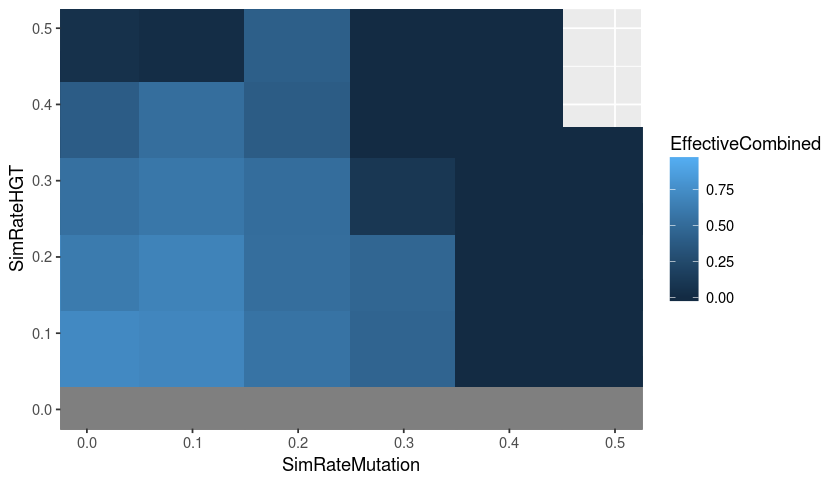

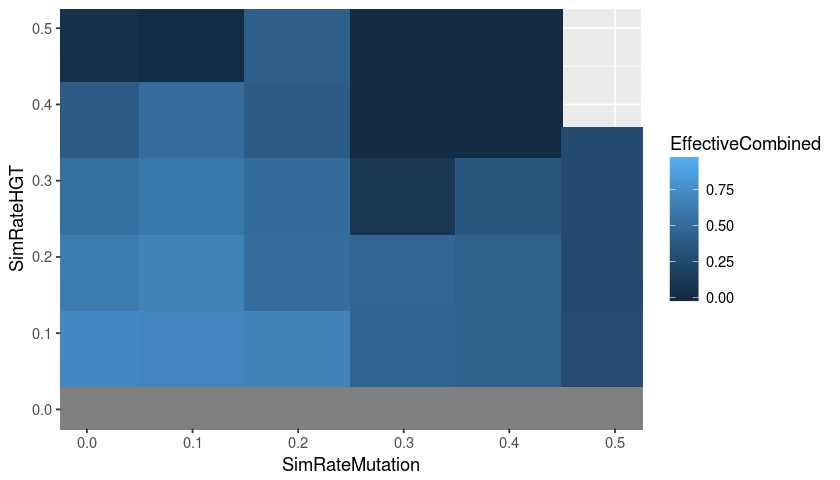

In [134]:
# Manually deriving heatmap colors - not necessary with ggplot
#heatColors = heat.colors(100)
#effectiveColors <- resultsSet$EffectiveCombined
#effectiveColors[is.nan(effectiveColors)] <- 0.00
#effectiveColors <- round(effectiveColors, 2) * 100
#effectiveColors[effectiveColors == 0] <- 1
#effectiveColors <- heatColors[effectiveColors]

library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 4)

resultsSubset = resultsSet[resultsSet$Distance == 0.4 & resultsSet$MinTaxaRep == 0.50 & resultsSet$MinProteinRep == 0.70,]
ggplot(resultsSubset, aes(x=SimRateMutation, y=SimRateHGT,  colour=EffectiveCombined)) +geom_point(size=30, shape=15) 

resultsSubset = resultsSet[resultsSet$Distance == 0.5 & resultsSet$MinTaxaRep == 0.50 & resultsSet$MinProteinRep == 0.70,]
ggplot(resultsSubset, aes(x=SimRateMutation, y=SimRateHGT,  colour=EffectiveCombined)) +geom_point(size=30, shape=15) 

resultsSubset = resultsSet[resultsSet$Distance == 0.6 & resultsSet$MinTaxaRep == 0.50 & resultsSet$MinProteinRep == 0.70,]
ggplot(resultsSubset, aes(x=SimRateMutation, y=SimRateHGT,  colour=EffectiveCombined)) +geom_point(size=30, shape=15) 